# Implementation of a Perceptron in Python

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Paramaters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    
    n_iter: int
        The epoch
    
    random_state: int
        A seed number to generate random number to initialize the weights
        
    Attributes
    ----------
    w_ : 1-d array
        Weights after fitting aka learning.
    
    errors_: list
        Number of misclassifications in EACH epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit Perceptron on training data
        
        Paramaters
        ----------
        X: array-like, or matrix. Shape is [n_examples, n_features]
        Training dataset. A matrix containing n examples (lines), each with n features(columns).
        
        y: array-like. Shape is [n_examples]
        n Target values. Where the nth value is the target value for
        the nth training example in X
        
        Returns
        ----------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.errors_= []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y): #xi is the "current" training example
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) #increment errors by 1 if update is not zero (algo misclassified)
            
            self.errors_.append(errors) #add the numbers of mistakes for this epoch
            
        return self
        
    def net_input(self, X):
        """Calculate net input (i.e. linear combination)"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #the bias unit
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) #Where net input is > 0, put 1, otherwise put -1

# Training the perceptron

Now, we will test the perceptron using:
1. Two features (two columns): The **sepal length** and **petal length** 
2. Two flower classes: **Setosa** and **Versicolor**

We chose two consider only two classes because our perceptron is a **binary** classifier.
However, considering only two features is allow us to visualize the decision regions in a *scatterplot* for learning. Our preceptron can handle more than two features.

### Loading the Iris dataset into a panda dataframe

In [2]:
import os
import pandas as pd

#load the dataset into Panda dataframe
df = pd.read_csv('./iris.data',
                 header=None,
                 encoding='utf-8')

#print the last five line to make sure the data is there
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


### Form the training data to feed the perceptron

As previously mentioned, we will be using two features(sepal and petal lengths), and two class labels: versicolor (1) and setosa (-1)

In [3]:
import matplotlib.pyplot as plt

#select setosa and versicolor labels (4th column) and turn them to 1 or -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#Create a matrix only containing the sepal length and petal length
#We grab the first "100 lines", and the "first" and "third" columns
X = df.iloc[0:100, [0, 2]].values

#print(X)

### Plot the data

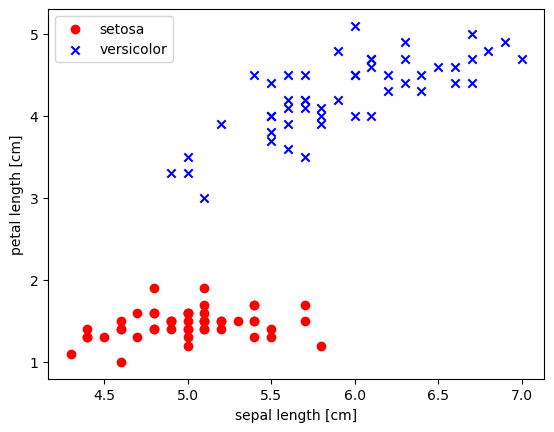

In [4]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#display the graph
plt.show()

As you can see in the above graph, the two classes are **linearly separable** (can be separated by a linear decision boundary). So, we know that the perceptron classifier we wrote earlier, will do a good job. But don't take my word for it, let's see it in action.

### Let's feed the training data into the perceptron

In [5]:
#Our new shiny perceptron :)
perceptron = Perceptron(eta=0.1, n_iter=10)

#Train the perceptron with the training set "X", and the label column "y"
#Both "X", and "y" were defined in Cell 3 of this notebook
perceptron.fit(X, y)

We finished training the perceptron, but let's plot the number of times our perceptron made a mistake for each epoch to see how it performed from one iteration to another.

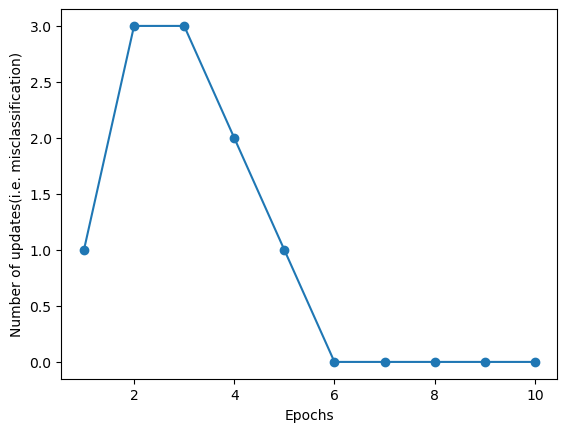

In [6]:
plt.plot(range(1, len(perceptron.errors_) + 1),
        perceptron.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates(i.e. misclassification)')

#show the graph
plt.show()

We set the epoch to `10` when creating the perceptron. That means we asked our perceptron to **iterate** of the training set 10 times. In order words, each training example in the training set was processed 10 times by the perceptron.

We can also see that after the ***sixth*** iteration on the training set, *the perceptron no longer makes mistakes*, so it no longer updates `w_`, the weight vector. That's why the number of updates remains zero.

Because the number of updates stabilizes after the sixth epoch, we say that the perceptron **converges** at this epoch.